In [2]:
!pip install -U git+https://github.com/albumentations-team/albumentations
#import albumentations as alb

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-5o1qxzya
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-5o1qxzya
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65166 sha256=615cc5ed45c766dfb5303f2152f8b96eaa6f696a7db07699f37882b29dac513b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qw5wlmdy/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [3]:
%matplotlib inline
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

#from albumentations import (
#    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
#    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
#    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
#    IAASharpen, IAAEmboss, Flip, OneOf, Compose, RandomScale,RandomSizedBBoxSafeCrop, ReplayCompose
#)


In [4]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [5]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
image = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')

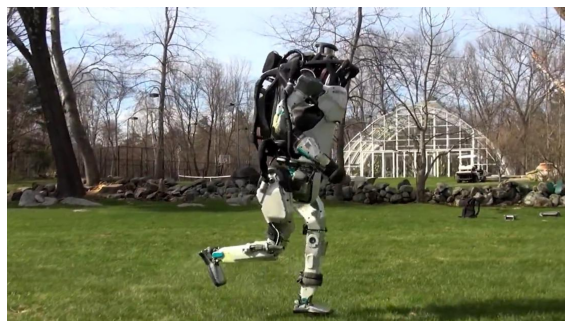

In [29]:
transform = A.ReplayCompose([
    A.HorizontalFlip(p=1),
    A.RandomRotate90(p=1)
])
random.seed(42) 
data = transform(image=image)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [35]:
data['replay']['transforms'][0]['applied']

True

In [28]:
#左右反転 x=1,y=1を0度
def angle_horizontal_mirror_image_inversion(angle,inverse_bool):
    #360度以上を想定し、360度以下にする
    angle = angle % 360
    #inverseを実行した場合のみ反転
    if inverse_bool:
        if 0 < angle <=180:
          angle = 180 - angle
        else:
          angle = 360 - (angle - 180)
    else:
        pass
    return angle

angle_horizontal_mirror_image_inversion(370, True)

170

In [ ]:
#GTxmin/xmaxが画像からはみ出ていたら、

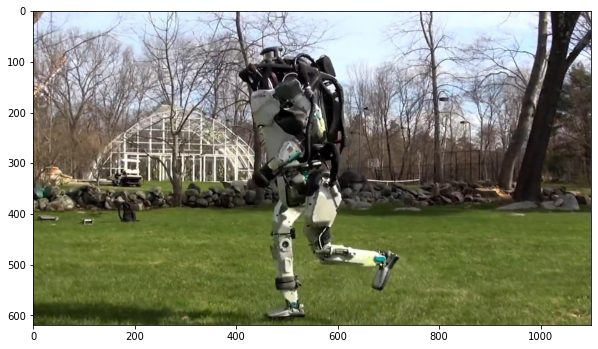

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [ ]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

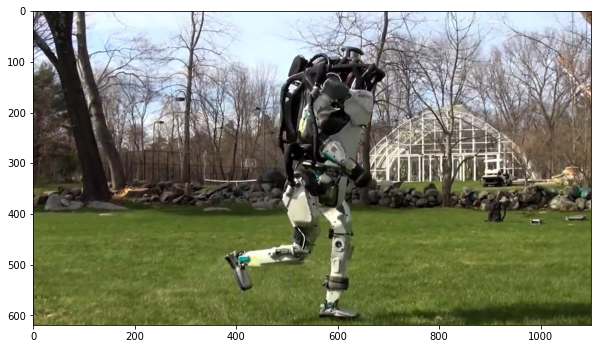

In [ ]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, image)


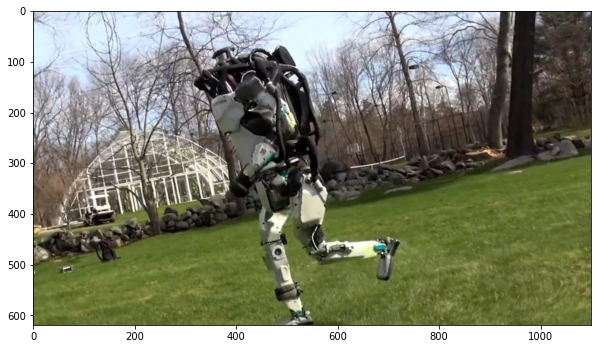

In [ ]:
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)

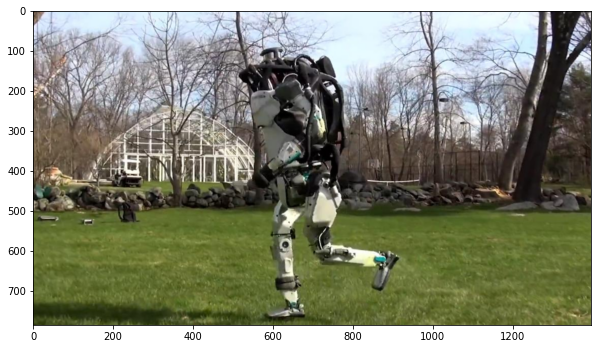

In [ ]:
aug = RandomScale(scale_limit=0.7, interpolation=1, always_apply=True, p=1)
augment_and_show(aug, image)

In [ ]:
aug(bboxes=bboxes)['bboxes']# image, mask, bboxes, keypoints


NameError: ignored

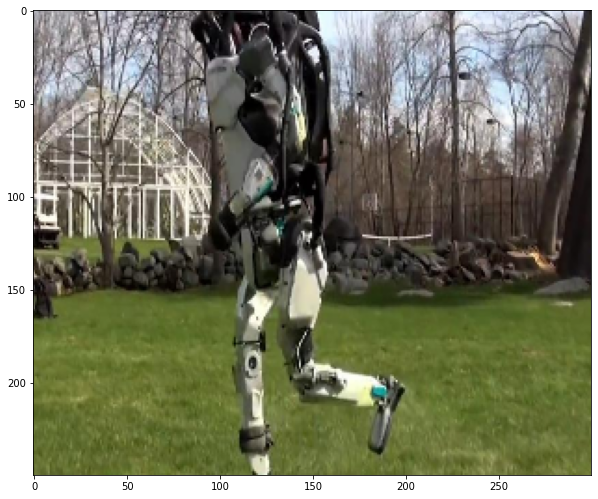

In [ ]:


aug = RandomSizedBBoxSafeCrop(250, 300, erosion_rate=0.7, interpolation=1, always_apply=False, p=1.0)
augment_and_show(aug, image)


In [ ]:
!pip install opencv-python

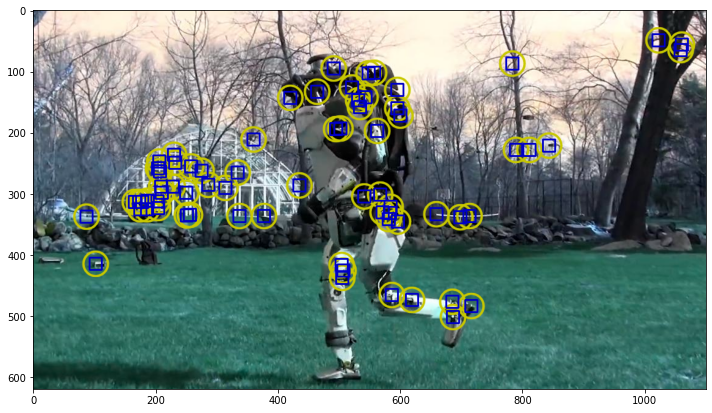

AttributeError: ignored

In [ ]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt

image2 = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')
def visualize(image, keypoints, bboxes):
    overlay = image.copy()
    for kp in keypoints:
        cv2.circle(overlay, (int(kp[0]), int(kp[1])), 20, (0, 200, 200), thickness=2, lineType=cv2.LINE_AA)

    for box in bboxes:
        cv2.rectangle(overlay, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (200, 0, 0), thickness=2)

    return overlay


def main():
    image = image2#cv2.imread("images/image_1.jpg")

    keypoints = cv2.goodFeaturesToTrack(
        cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), maxCorners=100, qualityLevel=0.5, minDistance=5
    ).squeeze(1)

    bboxes = [(kp[0] - 10, kp[1] - 10, kp[0] + 10, kp[1] + 10) for kp in keypoints]

    disp_image = visualize(image, keypoints, bboxes)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(disp_image, cv2.COLOR_RGB2BGR))
    plt.tight_layout()
    plt.show()

    aug = A.Compose(
        [A.ShiftScaleRotate(scale_limit=0.1, shift_limit=0.2, rotate_limit=10, always_apply=True)],
        bbox_params=A.BboxParams(format="pascal_voc", label_fields=["bbox_labels"]),
        keypoint_params=A.KeypointParams(format="xy"),
    )

    for _i in range(10):
        data = aug(image=image, keypoints=keypoints, bboxes=bboxes, bbox_labels=np.ones(len(bboxes)))

        aug_image = data["image"]
        aug_image = visualize(aug_image, data["keypoints"], data["bboxes"])

        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    main()

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-l9imhxmi
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-l9imhxmi
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65166 sha256=9e018005c1c48239f2ed0c8c7939757113aa9d0fe6556470c189a69e40332ec1
  Stored in directory: /tmp/pip-ephem-wheel-cache-fu94rbpg/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


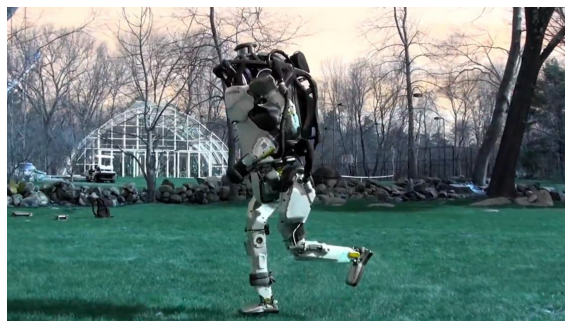

In [ ]:
import random

import cv2
import matplotlib.pyplot as plt
import albumentations as A

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

image = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')
#image = cv2.imread('images/parrot.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [ ]:
transform = A.ReplayCompose([
    A.Resize(512, 512, always_apply=True),
    A.RandomCrop(200, 200, always_apply=True),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])

AttributeError: ignored

In [ ]:
random.seed(7)
data = transform(image=image)
visualize(data['image'])